In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline

In [2]:
start_date=datetime.datetime(2017,12,6)
end_date=datetime.datetime(2023,12,6)
tickers = 'TSLA'   #you can insert any ticker
prices = yf.download(tickers, start=start_date, end=end_date)
historical = prices['Adj Close'].dropna(how='all')
ret = historical.pct_change()[1:] #daily returns for the month
ret

[*********************100%%**********************]  1 of 1 completed


Date
2017-12-07   -0.006448
2017-12-08    0.012498
2017-12-11    0.043728
2017-12-12    0.036849
2017-12-13   -0.005865
                ...   
2023-11-29   -0.010457
2023-11-30   -0.016630
2023-12-01   -0.005207
2023-12-04   -0.013608
2023-12-05    0.013329
Name: Adj Close, Length: 1508, dtype: float64

In [15]:
stats = ret.describe()

# Print the statistics
print(stats)

count    1508.000000
mean        0.002421
std         0.040161
min        -0.210628
25%        -0.018252
50%         0.001660
75%         0.020944
max         0.198949
Name: Adj Close, dtype: float64


In [3]:
import numpy as np
sample_variance = np.var(ret, ddof=1)
sample_std = np.std(ret, ddof=1)
last_price = S0 = historical.iloc[-1]
sample_std

0.04016121486963199

In [4]:
last_price
S0 = last_price
S0

238.72000122070312

# Above is the historical Volatility, Traders use the Implied Volatility which is more precise and which can be found in Bloomberg

# Geometric Brownian Motion
 - Drift and Diffusion Terms in the Stock Price Model
 - The formula for the stock price model includes both drift and diffusion terms. These terms represent the two main forces influencing the stock price:

 - Drift: This term represents the expected change in the stock price over time. It is typically calculated as the risk-free interest rate minus the expected dividend yield.
 - Diffusion: This term represents the uncertainty or randomness in the stock price movements. It is typically modeled using Brownian motion, which is a random process with zero mean and increasing variance over time.
 - Here is the formula for the stock price model:

 - dS = μ * S * dt + σ * S * dW

 - where:

 - dS is the change in the stock price over time
 - μ is the drift term (risk-free interest rate - expected dividend yield)
 - S is the current stock price
 - dt is the time interval
 - σ is the diffusion term (volatility)
 - dW is a Wiener increment (representing the random movement of the stock price)


In [14]:
import math
from numpy import *
from time import time
# star import for shorter code
random.seed(20000)
t0 = time()
# Parameters
S0 = last_price;
K = 260;
T = 1.0;
r = 0.05;
sigma = sample_std
M = 252;
dt = T / M;
I = 250000
# Simulating I paths with M time steps
drift_term = (r - 0.5 * sigma ** 2) * dt
diffusion_term = sigma * math.sqrt(dt)* random.standard_normal((M + 1, I))
S = S0 * exp(cumsum(drift_term + diffusion_term, axis=0))
# if only the final values are of interest
S[0] = S0
# Mean of the discounted payoff
C0 = math.exp(-r * T) * sum(maximum(S[-1] - K, 0)) / I
# Results output
tnp2 = time() - t0

print('The European Option Value is: ', C0)  # The European Option Value is:  8.165807966259603
print('The Execution Time is: ',tnp2)

The European Option Value is:  1.0310441441682483
The Execution Time is:  2.0737268924713135


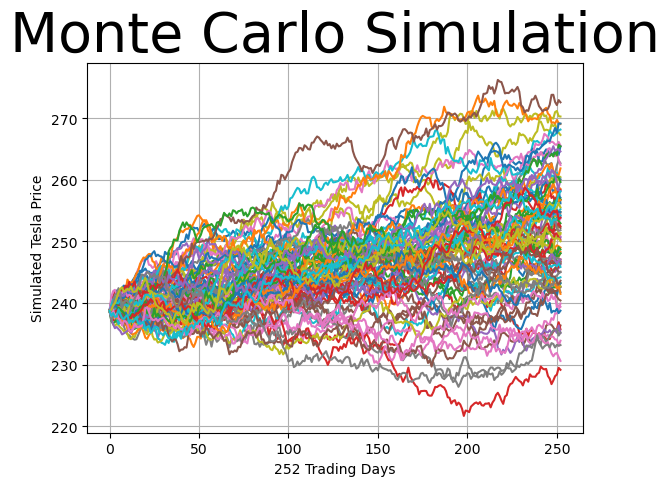

In [18]:
import matplotlib.pyplot as plt
plt.plot(S[:, :80])
plt.grid(True)
plt.xlabel('252 Trading Days')
plt.ylabel('Simulated Tesla Price')
plt.title('Monte Carlo Simulation', size = 40)
plt.show()

Text(0, 0.5, 'frequency')

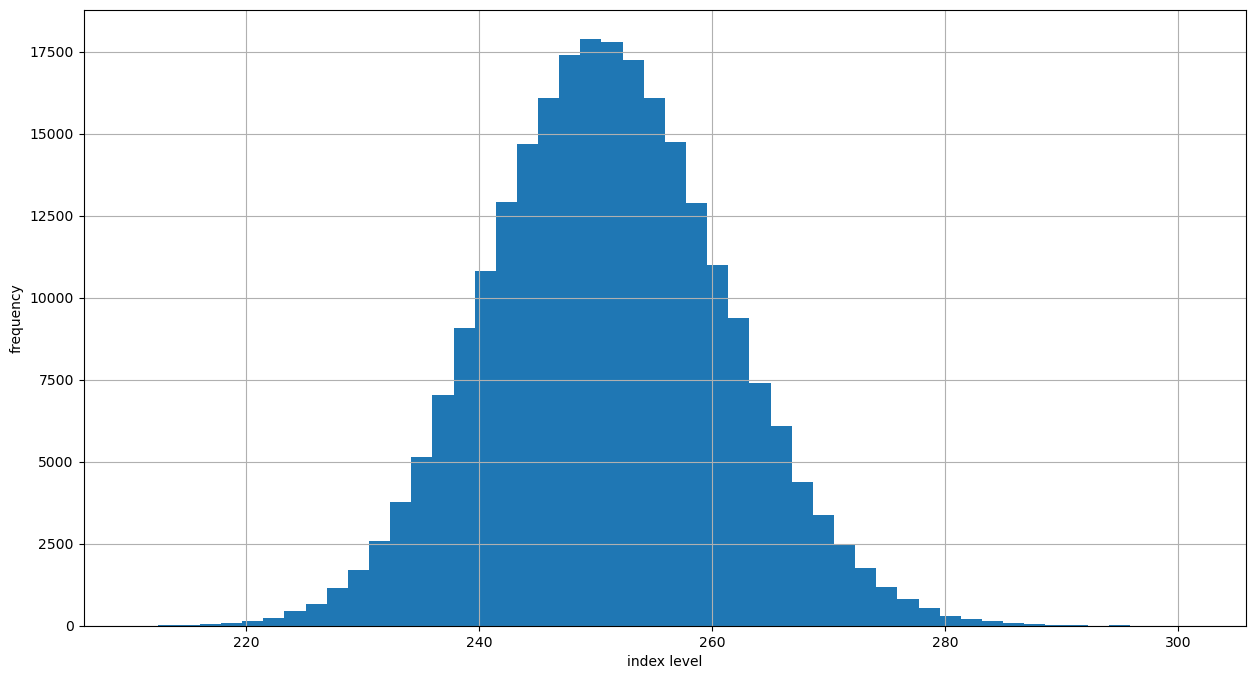

In [19]:
plt.rcParams["figure.figsize"] = (15,8)
plt.hist(S[-1], bins=50)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')

In [ ]:
import numpy as np
plt.rcParams["figure.figsize"] = (15,8)
plt.hist(np.maximum(S[-1] - K, 0), bins=50) # if the price is negative the max will be 0
plt.grid(True)
plt.xlabel('option inner value')
plt.ylabel('frequency')
plt.ylim(0, 50000)